This project is used for social media analysis where insights are generated about current market issue and sentiments related to the same. 

### Topic Identified - Indian Stocks

In [2]:
#pip install praw

In [3]:
import praw

# Set up your Reddit API credentials
reddit = praw.Reddit(
    client_id='Bc6C5ymMGPN3VrOjUdL2OA',
    client_secret='Ken8EvJWibRim5ckvs1nhnSRAupSWA',
    user_agent='Jasleen Kaur'
)

In [4]:
subreddit_name = 'IndianStocks'
subreddit = reddit.subreddit(subreddit_name)

### Extracting Data

In [1]:
# for post in subreddit.hot(limit=100):
#     print(post.title)
#     print()

In [6]:
import pandas as pd
import praw

# Fetching the top posts of the current month from the subreddit
posts = subreddit.top("month")

# Dictionary to store post information
post_data = {
    "Title": [],
    "Post Text": [],
    "ID": [],
    "Score": [],
    "Author": [],
    "Total Comments": [],
    "Post URL": [],
    "Comments": []  # New entry to store comments
}

# Extracting information from each post and populating the dictionary
for post in posts:
    # Title of each post
    post_data["Title"].append(post.title)

    # Text inside a post
    post_data["Post Text"].append(post.selftext)

    # Unique ID of each post
    post_data["ID"].append(post.id)

    # The score of a post
    post_data["Score"].append(post.score)

    # Extract author from each post
    post_data["Author"].append(post.author.name if post.author else None)

    # Total number of comments inside the post
    post_data["Total Comments"].append(post.num_comments)

    # URL of each post
    post_data["Post URL"].append(post.url)

    # Extracting comments from the post and storing them as a list
    comments = [comment.body for comment in post.comments]
    post_data["Comments"].append(comments)

# Creating a pandas DataFrame from the collected post data
df = pd.DataFrame(post_data)

# Displaying the DataFrame
print(df)


C:\Users\hp\AppData\Local\Temp\ipykernel_18924\1572528099.py:6: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  posts = subreddit.top("month")


                                                Title  \
0   At the end of the year, I got a 46% return thi...   
1   Piyush Goyal predicts that India economy will ...   
2                     Zerodha question please explain   
3   Ola Electric files for Rs 5,500 crore IPO, bec...   
4       India's current account deficit is shrinking.   
..                                                ...   
95  OptionAnalytics for Nifty - Live MaxPain vs Sp...   
96  UPI transactions in semi-urban and rural retai...   
97  OptionAnalytics for Nifty - How is the Stronge...   
98  OptionAnalytics for Nifty - Live MaxPain vs Sp...   
99  Paytm records 50X surge in search for travel t...   

                                            Post Text       ID  Score  \
0                                                      18u86fs    385   
1   **Good morning, everyone!**\n\nGuess what? The...  18yygwl     98   
2   Can anyone explain how this answer in zerodha ...  198vycs    104   
3   **Good morning, eve

In [9]:
df.head()

,Title,Post Text,ID,Score,Author,Total Comments,Post URL,Comments
0,"At the end of the year, I got a 46% return thi...",,18u86fs,385,Empty-Body9583,162,https://i.redd.it/ioh5opu4dd9c1.jpeg,"[450rs, Mine is running at 40 percent for mutu..."
1,Piyush Goyal predicts that India economy will ...,"**Good morning, everyone!**\n\nGuess what? The...",18yygwl,98,Empty-Body9583,54,https://www.reddit.com/r/IndianStocks/comments...,"[Jobs kaha h?, Number badhate jao logo ki zind..."
2,Zerodha question please explain,Can anyone explain how this answer in zerodha ...,198vycs,104,sarathy7,22,https://i.redd.it/8rq633r000dc1.jpeg,[should be 3rd option i guess. \nIf the inve...
3,"Ola Electric files for Rs 5,500 crore IPO, bec...","**Good morning, everyone!**\n\nLet's dive into...",18qchtn,38,Empty-Body9583,6,https://www.reddit.com/r/IndianStocks/comments...,[STAY THE GODDAMN HELL AWAY THE OLA IPO. NO IT...
4,India's current account deficit is shrinking.,"Good morning to all readers,\n\nLet's delve in...",18rs9gq,33,Empty-Body9583,2,https://www.reddit.com/r/IndianStocks/comments...,"[Commenting for reach !!, GPT?🙂]"


In [10]:
df.to_csv('reddit.csv', index=False)

### Identifying Influencers

In [11]:
#Identifying users with a high number of comments. Frequent engagement suggests active participation in discussions.

influencers_comments = df.groupby('Author')['Total Comments'].sum().sort_values(ascending=False)
print(influencers_comments)


Author
Empty-Body9583         234
PassiveTraders          29
sarathy7                22
penugondaz              20
Rfling7                 16
Soft-Committee-1011     10
NirmalaRani-0411         8
Shivaissupreme           5
parvezdosani             5
rampart_apex             2
RaiAkshay                1
_Killua_04               1
longterm_Invest          1
Subject-Tea9236          0
Name: Total Comments, dtype: int64


In [12]:
# Find the influencer based on the maximum number of posts
top_influencer_posts = df['Author'].value_counts().sort_values(ascending=False)

print(top_influencer_posts)

penugondaz             31
Empty-Body9583         28
PassiveTraders         28
Rfling7                 3
sarathy7                1
Shivaissupreme          1
Subject-Tea9236         1
Soft-Committee-1011     1
parvezdosani            1
longterm_Invest         1
_Killua_04              1
rampart_apex            1
RaiAkshay               1
NirmalaRani-0411        1
Name: Author, dtype: int64


Following clearly represents top 3 influencers based on the number of posts shared :-

1. penugondaz             31
2. Empty-Body9583         28
3. PassiveTraders         28

Following represents influencer based on the number of comments :-

1. Empty-Body9583         234
2. PassiveTraders          29
3. sarathy7                22

**Clearly author "Empty-Body9583" is the top influencer based on number of posts shared and number of comments.**

### Extracting the comments from various Posts

In [13]:
# Creating a new DataFrame with a 'Comments' column
df_comments = pd.DataFrame({"Comments": df["Comments"].explode().reset_index(drop=True)})

df_comments.head()

,Comments
0,450rs
1,Mine is running at 40 percent for mutual funds...
2,21% did nothing but some good mutual funds and...
3,33.44%.
4,Overall portfolio gain of 51.91%. One stock of...


In [14]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
import re

def preprocess_comments(comment):
    # Checking if the comment is a string or bytes-like object
    if isinstance(comment, (str, bytes)):
        # Convert to string if it's bytes
        comment = comment.decode('utf-8') if isinstance(comment, bytes) else comment

        # Remove numbers and special characters, convert to lowercase
        cleaned_comment = re.sub(r'[^a-zA-Z\s]', '', comment).lower()
        return cleaned_comment
    else:
        # If not a string or bytes-like object, return an empty string or handle accordingly
        return ''

# Apply the preprocessing function to the "Comments" column
df_comments['Converted_Comments'] = df_comments['Comments'].apply(preprocess_comments)

# Display the DataFrame with cleaned comments
print(df_comments[['Comments', 'Converted_Comments']])


                                              Comments  \
0                                                450rs   
1    Mine is running at 40 percent for mutual funds...   
2    21% did nothing but some good mutual funds and...   
3                                              33.44%.   
4    Overall portfolio gain of 51.91%. One stock of...   
..                                                 ...   
232  How do I use this data? The Orange graph in th...   
233                                                NaN   
234  How do I use this data? The blue graph in the ...   
235  How do I use this data? The Orange graph in th...   
236                                                NaN   

                                    Converted_Comments  
0                                                   rs  
1    mine is running at  percent for mutual funds a...  
2     did nothing but some good mutual funds and sm...  
3                                                       
4    overall portf

### Applying various NLP cleaning techniques on the extracted data

- Tokenization
- Lowercasing
- Removing stop words and punctuations
- Lemmatization

In [16]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_comments_clean(comment):
    # Remove URLs
    comment = re.sub(r'http\S+', '', comment)
    
    # Tokenization and lowercase
    tokens = word_tokenize(comment.lower())
    
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into a string
    cleaned_comment = ' '.join(tokens)
    
    return cleaned_comment


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# Apply the preprocessing function to the "Comments" column
df_comments['Cleaned_Comments'] = df_comments['Converted_Comments'].apply(preprocess_comments_clean)

# Display the DataFrame with cleaned comments
print(df_comments[['Comments', 'Converted_Comments', 'Cleaned_Comments']])

                                              Comments  \
0                                                450rs   
1    Mine is running at 40 percent for mutual funds...   
2    21% did nothing but some good mutual funds and...   
3                                              33.44%.   
4    Overall portfolio gain of 51.91%. One stock of...   
..                                                 ...   
232  How do I use this data? The Orange graph in th...   
233                                                NaN   
234  How do I use this data? The blue graph in the ...   
235  How do I use this data? The Orange graph in th...   
236                                                NaN   

                                    Converted_Comments  \
0                                                   rs   
1    mine is running at  percent for mutual funds a...   
2     did nothing but some good mutual funds and sm...   
3                                                        
4    overall 

In [18]:
df_comments.head()

,Comments,Converted_Comments,Cleaned_Comments
0,450rs,rs,r
1,Mine is running at 40 percent for mutual funds...,mine is running at percent for mutual funds a...,mine running percent mutual fund percent np po...
2,21% did nothing but some good mutual funds and...,did nothing but some good mutual funds and sm...,nothing good mutual fund small case
3,33.44%.,,
4,Overall portfolio gain of 51.91%. One stock of...,overall portfolio gain of one stock of mine r...,overall portfolio gain one stock mine rose mad...


In [19]:
df_comments.dtypes

Comments              object
Converted_Comments    object
Cleaned_Comments      object
dtype: object

In [20]:
# Convert data types of all columns to strings
df_comments = df_comments.astype(str)

In [21]:
from textblob import TextBlob
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [22]:
# # Extract text blobs for each comment
# text_blobs = [TextBlob(comment) for comment in comments]

# # Print the extracted text blobs
# for i, text_blob in enumerate(text_blobs):
#     print(f"Comment {i}: {text_blob}")

### Creating wordcloud to know the major trends that people are talking about. 

(-0.5, 799.5, 499.5, -0.5)

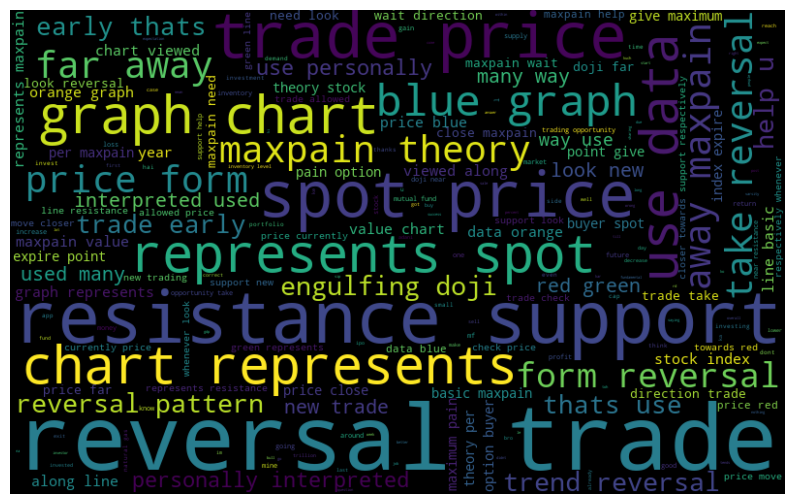

In [23]:
all_words = ' '.join([text for text in df_comments['Cleaned_Comments']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

### Identifying the keywords in each comment

In [24]:
# Function to extract keywords and their frequencies from a text
def extract_keywords(text):
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in word_tokenize(text) if word.isalnum() and word.lower() not in stop_words]
    return FreqDist(words)

In [25]:
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize

In [26]:
# Apply the extract_keywords function to the 'Comments' column
df_comments['Keywords'] = df_comments['Comments'].apply(extract_keywords)

# Display the DataFrame with the extracted keywords
print(df_comments[['Comments', 'Keywords']])

                                              Comments  \
0                                                450rs   
1    Mine is running at 40 percent for mutual funds...   
2    21% did nothing but some good mutual funds and...   
3                                              33.44%.   
4    Overall portfolio gain of 51.91%. One stock of...   
..                                                 ...   
232  How do I use this data? The Orange graph in th...   
233                                                nan   
234  How do I use this data? The blue graph in the ...   
235  How do I use this data? The Orange graph in th...   
236                                                nan   

                                              Keywords  
0                                         {'450rs': 1}  
1    {'mine': 1, 'running': 1, '40': 1, 'percent': ...  
2    {'21': 1, 'nothing': 1, 'good': 1, 'mutual': 1...  
3                                                   {}  
4    {'overall': 1

In [27]:
df_comments.head()

,Comments,Converted_Comments,Cleaned_Comments,Keywords
0,450rs,rs,r,{'450rs': 1}
1,Mine is running at 40 percent for mutual funds...,mine is running at percent for mutual funds a...,mine running percent mutual fund percent np po...,"{'mine': 1, 'running': 1, '40': 1, 'percent': ..."
2,21% did nothing but some good mutual funds and...,did nothing but some good mutual funds and sm...,nothing good mutual fund small case,"{'21': 1, 'nothing': 1, 'good': 1, 'mutual': 1..."
3,33.44%.,,,{}
4,Overall portfolio gain of 51.91%. One stock of...,overall portfolio gain of one stock of mine r...,overall portfolio gain one stock mine rose mad...,"{'overall': 1, 'portfolio': 1, 'gain': 1, 'one..."


In [28]:
df_comments = df_comments.drop("Converted_Comments", axis=1)

In [29]:
df_comments.head()

,Comments,Cleaned_Comments,Keywords
0,450rs,r,{'450rs': 1}
1,Mine is running at 40 percent for mutual funds...,mine running percent mutual fund percent np po...,"{'mine': 1, 'running': 1, '40': 1, 'percent': ..."
2,21% did nothing but some good mutual funds and...,nothing good mutual fund small case,"{'21': 1, 'nothing': 1, 'good': 1, 'mutual': 1..."
3,33.44%.,,{}
4,Overall portfolio gain of 51.91%. One stock of...,overall portfolio gain one stock mine rose mad...,"{'overall': 1, 'portfolio': 1, 'gain': 1, 'one..."


### Sentiment Analysis using TextBlob

In [30]:
# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

# Apply sentiment analysis to the "Comments" column
df_comments['Sentiment'] = df_comments['Comments'].apply(get_sentiment)

# Classify sentiment based on polarity
df_comments['Sentiment_Label'] = df_comments['Sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Display the DataFrame with sentiment information
#print(df_comments[['Comments', 'Sentiment', 'Sentiment_Label']])

In [31]:
df_comments.head()

,Comments,Cleaned_Comments,Keywords,Sentiment,Sentiment_Label
0,450rs,r,{'450rs': 1},0.000000,Neutral
1,Mine is running at 40 percent for mutual funds...,mine running percent mutual fund percent np po...,"{'mine': 1, 'running': 1, '40': 1, 'percent': ...",0.000000,Neutral
2,21% did nothing but some good mutual funds and...,nothing good mutual fund small case,"{'21': 1, 'nothing': 1, 'good': 1, 'mutual': 1...",0.225000,Positive
3,33.44%.,,{},0.000000,Neutral
4,Overall portfolio gain of 51.91%. One stock of...,overall portfolio gain one stock mine rose mad...,"{'overall': 1, 'portfolio': 1, 'gain': 1, 'one...",0.311111,Positive


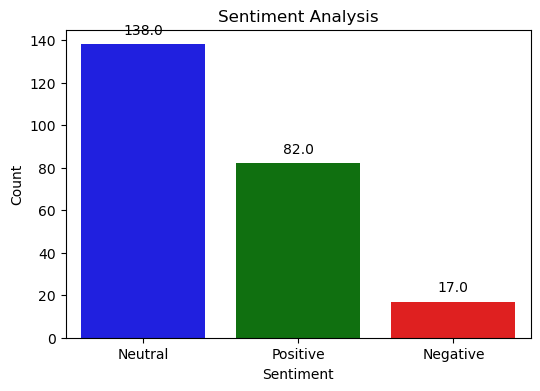

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a bar plot of sentiment counts
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Sentiment_Label', data=df_comments, palette={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'})

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis')

# Add count labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()


### Wordcloud based on different sentiments - Neutral , Postive and Negative

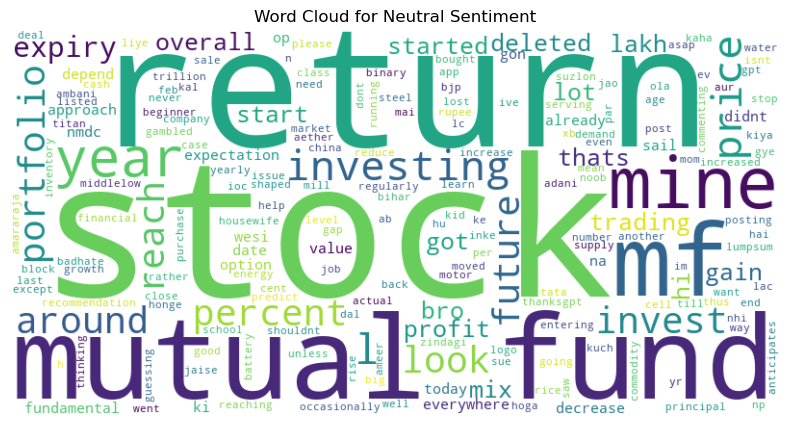

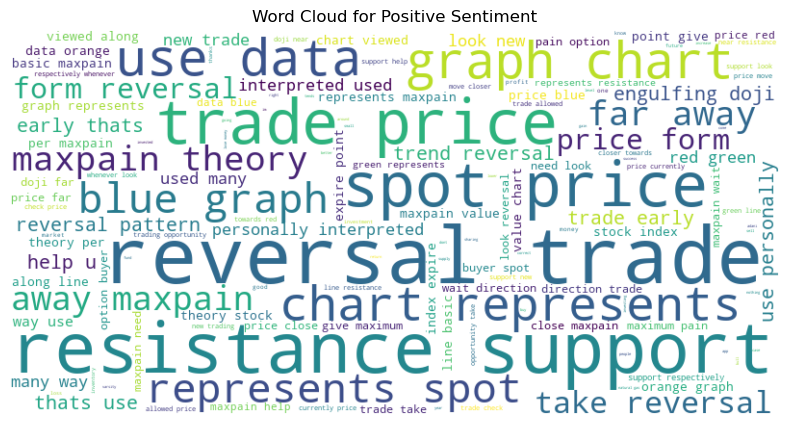

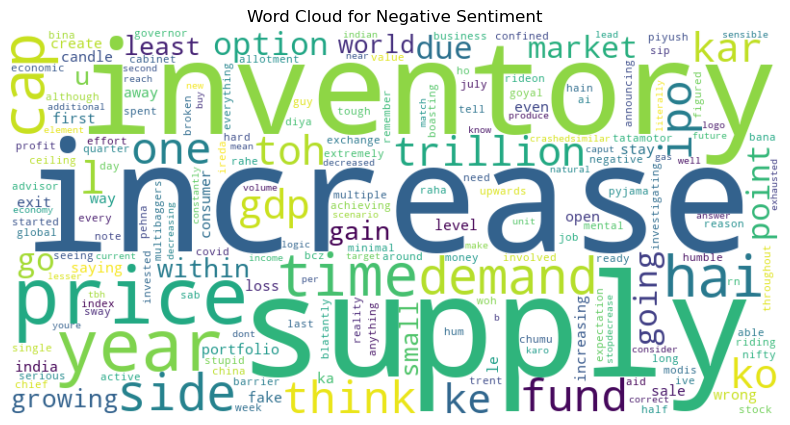

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display word cloud for a specific sentiment label
def generate_wordcloud(sentiment_label):
    comments = df_comments[df_comments['Sentiment_Label'] == sentiment_label]['Cleaned_Comments']
    text = ' '.join(comments)
    
    # Create WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment_label} Sentiment')
    plt.show()

# Generate and display word clouds for each sentiment label
sentiment_labels = df_comments['Sentiment_Label'].unique()
for label in sentiment_labels:
    generate_wordcloud(label)


In [36]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [37]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Tokenize, remove stopwords, and lemmatize the comments
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return tokens

df_comments['Tokenized_Comments'] = df_comments['Cleaned_Comments'].apply(preprocess_text)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df_comments['Tokenized_Comments'])
corpus = [dictionary.doc2bow(tokens) for tokens in df_comments['Tokenized_Comments']]

# Build the LDA model
num_topics = 10 
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)

# Print the topics and associated words
print("LDA Topics:")
for topic_id, words in lda_model.print_topics():
    print(f"Topic {topic_id + 1}: {words}")

# Assign the dominant topic to each comment
df_comments['Dominant_Topic'] = df_comments['Tokenized_Comments'].apply(lambda tokens: max(lda_model.get_document_topics(dictionary.doc2bow(tokens)), key=lambda x: x[1])[0])

# Display the DataFrame with the dominant topic for each comment
print(df_comments[['Cleaned_Comments', 'Dominant_Topic']])

LDA Topics:
Topic 1: 0.026*"l" + 0.017*"going" + 0.012*"away" + 0.012*"stay" + 0.012*"ur" + 0.012*"want" + 0.012*"gain" + 0.012*"one" + 0.012*"stock" + 0.011*"tell"
Topic 2: 0.025*"stock" + 0.022*"mf" + 0.014*"portfolio" + 0.011*"option" + 0.011*"gain" + 0.011*"last" + 0.009*"year" + 0.008*"loss" + 0.007*"value" + 0.007*"one"
Topic 3: 0.064*"price" + 0.052*"trade" + 0.051*"resistance" + 0.051*"support" + 0.039*"new" + 0.038*"reversal" + 0.028*"look" + 0.026*"red" + 0.026*"represents" + 0.026*"use"
Topic 4: 0.059*"fund" + 0.056*"mutual" + 0.028*"inventory" + 0.024*"mine" + 0.019*"increase" + 0.019*"future" + 0.019*"cap" + 0.014*"price" + 0.014*"percent" + 0.014*"small"
Topic 5: 0.031*"market" + 0.021*"side" + 0.017*"loss" + 0.016*"money" + 0.011*"ki" + 0.011*"k" + 0.011*"lose" + 0.010*"open" + 0.009*"going" + 0.007*"wesi"
Topic 6: 0.031*"profit" + 0.021*"k" + 0.011*"invest" + 0.011*"got" + 0.011*"one" + 0.011*"since" + 0.007*"stock" + 0.006*"market" + 0.006*"money" + 0.006*"good"
Topic 

### Topic Identification using LDA

In [41]:
# Number of top words to display for each topic
top_words_per_topic = 10

# Extract and print the top words for each topic
for topic_id in range(lda_model.num_topics):
    topic_words = lda_model.show_topic(topic_id, topn=top_words_per_topic)
    print(f"\nTopic {topic_id + 1}:")
    for word, weight in topic_words:
        print(f"{word}: {weight}")



Topic 1:
l: 0.026421071961522102
going: 0.017076969146728516
away: 0.011571881361305714
stay: 0.011567952111363411
ur: 0.011567945592105389
want: 0.01156520564109087
gain: 0.01156359352171421
one: 0.011562134139239788
stock: 0.01156010664999485
tell: 0.011493115685880184

Topic 2:
stock: 0.025198062881827354
mf: 0.02161554992198944
portfolio: 0.014485258609056473
option: 0.011022779159247875
gain: 0.010994858108460903
last: 0.010679647326469421
year: 0.008895570412278175
loss: 0.007721224799752235
value: 0.0074806008487939835
one: 0.007450506091117859

Topic 3:
price: 0.06360746920108795
trade: 0.051729537546634674
resistance: 0.050912439823150635
support: 0.05090833455324173
new: 0.039116695523262024
reversal: 0.038202282041311264
look: 0.028166262432932854
red: 0.025503380224108696
represents: 0.025502318516373634
use: 0.025501985102891922

Topic 4:
fund: 0.05912723392248154
mutual: 0.055649176239967346
inventory: 0.028280943632125854
mine: 0.02350141853094101
increase: 0.0190163385